In [ ]:
%%bash
tree data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob

In [6]:
ddir = "data"

In [ ]:
# release 75
# dAnnotatedFeatures=pd.read_csv(f'{ddir}/ensembl/raw/ftp.ensembl.org/pub/release-75/regulation/homo_sapiens/AnnotatedFeatures.gff.gz',
#                                names=['chromosome', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes'],
#                                 sep='\t')

## GWAS table flitering

In [28]:
dgwas_subset=pd.read_csv('/data/analysis/UKBB/raw/I10.gwas.imputed_v3.both_sexes.tsv',sep='\t',)
# dgwas=pd.read_csv('/data/analysis/UKBB/raw/variants.tsv',sep='\t')

In [19]:
print(dgwas_subset.shape)

(13791467, 12)


In [32]:
dgwas_subset_flt=dgwas_subset.loc[~dgwas_subset['low_confidence_variant'],:]
print(dgwas_subset_flt.shape)

(9058943, 12)


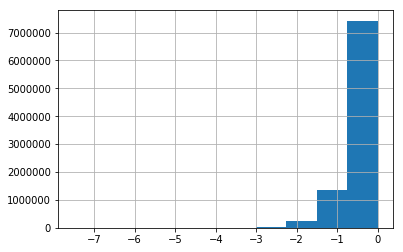

In [33]:
# dgwas_subset.loc[]
_=dgwas_subset_flt['pval'].apply(np.log10).hist()

In [35]:
sum(dgwas_subset_flt['pval']<1e-02)

96358

In [30]:
dgwas_subset['pval'].min()

1.9724299999999996e-103

In [27]:
dgwas_subset.head()

,variant,minor_allele,minor_AF,expected_case_minor_AC,low_confidence_variant,n_complete_samples,AC,ytx,beta,se,tstat,pval
4,1:692794:CA:C,C,0.110640,191.4070,False,361194,79924.7,200.2000,0.000158,0.000202,0.782302,0.434037
5,1:693731:A:G,G,0.115830,200.3860,False,361194,83674.4,206.1610,0.000095,0.000191,0.499534,0.617404
6,1:707522:G:C,C,0.097303,168.3350,False,361194,70290.8,174.3530,0.000126,0.000215,0.588785,0.556006
7,1:717587:G:A,A,0.015688,27.1403,False,361194,11332.9,32.0549,0.000538,0.000513,1.049410,0.293991
9,1:730087:T:C,C,0.056460,97.6761,False,361194,40786.2,107.9730,0.000312,0.000266,1.173680,0.240525


## Combining regulatory features

In [46]:
import glob
from os.path import exists,dirname,basename

In [54]:
i=0
for gffp in glob.iglob(f'{ddir}/ensembl/raw/ftp.ensembl.org/pub/grch37/update/regulation/homo_sapiens/RegulatoryFeatureActivity/*/homo_sapiens*.gff.gz'):
    dgff_regulation=pd.read_table(f'{ddir}/ensembl/raw/ftp.ensembl.org/pub/grch37/update/regulation/homo_sapiens/RegulatoryFeatureActivity/A549/homo_sapiens.GRCh37.A549.Regulatory_Build.regulatory_activity.20161117.gff.gz',
                             names=['chromosome', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes'])
    dgff_regulation['tissue type']=basename(dirname(gffp))
    if i==0:
        dgff_regulation_combo=dgff_regulation.copy()
    else:
        dgff_regulation_combo=dgff_regulation_combo.append(dgff_regulation)
    del dgff_regulation
    print(dgff_regulation_combo.shape)
    i+=1
#     break

(280027, 10)
(560054, 10)
(840081, 10)
(1120108, 10)
(1400135, 10)
(1680162, 10)
(1960189, 10)
(2240216, 10)
(2520243, 10)
(2800270, 10)
(3080297, 10)
(3360324, 10)
(3640351, 10)
(3920378, 10)
(4200405, 10)
(4480432, 10)
(4760459, 10)
(5040486, 10)
(5320513, 10)
(5600540, 10)
(5880567, 10)
(6160594, 10)
(6440621, 10)
(6720648, 10)
(7000675, 10)
(7280702, 10)
(7560729, 10)
(7840756, 10)
(8120783, 10)
(8400810, 10)
(8680837, 10)
(8960864, 10)
(9240891, 10)
(9520918, 10)
(9800945, 10)
(10080972, 10)
(10360999, 10)
(10641026, 10)
(10921053, 10)
(11201080, 10)
(11481107, 10)
(11761134, 10)
(12041161, 10)
(12321188, 10)
(12601215, 10)
(12881242, 10)
(13161269, 10)
(13441296, 10)
(13721323, 10)
(14001350, 10)
(14281377, 10)
(14561404, 10)
(14841431, 10)
(15121458, 10)
(15401485, 10)
(15681512, 10)
(15961539, 10)
(16241566, 10)
(16521593, 10)
(16801620, 10)
(17081647, 10)
(17361674, 10)
(17641701, 10)
(17921728, 10)
(18201755, 10)
(18481782, 10)
(18761809, 10)
(19041836, 10)


In [55]:
dgff_regulation_combo['regulatory_feature_stable_id']=dgff_regulation_combo['attributes'].apply(lambda x : [s.replace('regulatory_feature_stable_id=','') for s in x.split(';') if 'regulatory_feature_stable_id=' in s][0])

In [61]:
# dgff_regulation_combo.to_csv(f'{ddir}/ensembl/raw/dgff_regulation_combo.tsv',sep='\t')

In [62]:
f'{ddir}/ensembl/raw/dgff_regulation_combo.tsv'

'data/ensembl/raw/dgff_regulation_combo.tsv'

In [63]:
%ls -ltr data/ensembl/raw/dgff_regulation_combo.tsv

-rw-r--r-- 1 yizhenzhong cshl-hackathon 5540835004 Nov 11 02:15 data/ensembl/raw/dgff_regulation_combo.tsv


In [75]:
# to_table_pqt(dgff_regulation_combo.head(),'test.pqt')
#f'{ddir}/ensembl/raw/dgff_regulation_combo.pqt'
dgff_regulation_combo.loc[:,['chromosome',
 'source',
 'type',
 'start',
 'end',
 'score',
 'strand',
 'phase',
#  'attributes',
 'tissue type',
 'regulatory_feature_stable_id']].to_parquet('dgff_regulation_combo.pqt',engine='fastparquet',compression='gzip',)

In [77]:
dgff_regulation_combo["type"].value_counts()

open_chromatin_region       7489044
CTCF_binding_site           3892932
promoter_flanking_region    3164176
enhancer                    1920252
TF_binding_site             1566312
promoter                    1009120
Name: type, dtype: int64

In [80]:
dgff_regulation_combo["end"].max()

249240728

In [ ]:
# dgff_regulation_combo.loc[:,"att"]

In [76]:
dgff_regulation_combo.head()

,chromosome,source,type,start,end,score,strand,phase,attributes,tissue type,regulatory_feature_stable_id
0,15,Regulatory_Build,TF_binding_site,102118789,102119129,.,.,.,activity=INACTIVE;bound_end=102119230;bound_st...,H1_trophoblast,ENSR00000368862
1,7,Regulatory_Build,TF_binding_site,1619070,1619637,.,.,.,activity=INACTIVE;bound_end=1619683;bound_star...,H1_trophoblast,ENSR00000408425
2,22,Regulatory_Build,open_chromatin_region,34001171,34001716,.,.,.,activity=INACTIVE;bound_end=34001716;bound_sta...,H1_trophoblast,ENSR00000196038
3,19,Regulatory_Build,CTCF_binding_site,31805801,31806200,.,.,.,activity=REPRESSED;bound_end=31806200;bound_st...,H1_trophoblast,ENSR00000145779
4,1,Regulatory_Build,open_chromatin_region,60892868,60893296,.,.,.,activity=INACTIVE;bound_end=60893296;bound_sta...,H1_trophoblast,ENSR00000009711


In [60]:
dgff_regulation_combo.to_parquet?

In [8]:
# dpeaksgff=pd.read_table(f'{ddir}/ensembl/raw/ftp.ensembl.org/pub/grch37/update/regulation/homo_sapiens/Peaks/A549/CTCF/homo_sapiens.GRCh37.A549.CTCF.SWEmbl_R0005_IDR.peaks.20161117.gff.gz')

In [65]:
dgff_regulation_combo.head()

,chromosome,source,type,start,end,score,strand,phase,attributes,tissue type,regulatory_feature_stable_id
0,15,Regulatory_Build,TF_binding_site,102118789,102119129,.,.,.,activity=INACTIVE;bound_end=102119230;bound_st...,H1_trophoblast,ENSR00000368862
1,7,Regulatory_Build,TF_binding_site,1619070,1619637,.,.,.,activity=INACTIVE;bound_end=1619683;bound_star...,H1_trophoblast,ENSR00000408425
2,22,Regulatory_Build,open_chromatin_region,34001171,34001716,.,.,.,activity=INACTIVE;bound_end=34001716;bound_sta...,H1_trophoblast,ENSR00000196038
3,19,Regulatory_Build,CTCF_binding_site,31805801,31806200,.,.,.,activity=REPRESSED;bound_end=31806200;bound_st...,H1_trophoblast,ENSR00000145779
4,1,Regulatory_Build,open_chromatin_region,60892868,60893296,.,.,.,activity=INACTIVE;bound_end=60893296;bound_sta...,H1_trophoblast,ENSR00000009711


In [66]:
dgff_regulation_combo.columns.tolist()

['chromosome',
 'source',
 'type',
 'start',
 'end',
 'score',
 'strand',
 'phase',
 'attributes',
 'tissue type',
 'regulatory_feature_stable_id']

In [11]:
dgff_regulation.head()

,chromosome,source,type,start,end,score,strand,phase,attributes,regulatory_feature_stable_id
0,15,Regulatory_Build,TF_binding_site,102118789,102119129,.,.,.,activity=INACTIVE;bound_end=102119230;bound_st...,ENSR00000368862
1,7,Regulatory_Build,TF_binding_site,1619070,1619637,.,.,.,activity=INACTIVE;bound_end=1619683;bound_star...,ENSR00000408425
2,22,Regulatory_Build,open_chromatin_region,34001171,34001716,.,.,.,activity=INACTIVE;bound_end=34001716;bound_sta...,ENSR00000196038
3,19,Regulatory_Build,CTCF_binding_site,31805801,31806200,.,.,.,activity=REPRESSED;bound_end=31806200;bound_st...,ENSR00000145779
4,1,Regulatory_Build,open_chromatin_region,60892868,60893296,.,.,.,activity=INACTIVE;bound_end=60893296;bound_sta...,ENSR00000009711


In [42]:
dgff_regulation.shape

(280027, 10)

In [44]:
dgff_regulation["type"].value_counts()

open_chromatin_region       110133
CTCF_binding_site            57249
promoter_flanking_region     46532
enhancer                     28239
TF_binding_site              23034
promoter                     14840
Name: type, dtype: int64

In [ ]:
dgff_regulation.iloc[0,:].T.tolist()

In [ ]:
dgff.Regulatory_Build.value_counts()

In [ ]:
dgff.TF_binding_site.value_counts()

In [ ]:
%ls /data/analysis/ensembl/raw/ftp.ensembl.org/

In [ ]:
dgwas.head()

In [ ]:
dAnnotatedFeatures.head()